In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

$\textbf{FIGURE 1}$ The status code of the request response

In [2]:
#1. Read logfiles
log_boliga = pd.read_csv('log_boliga.csv')
log_dataforsyning = pd.read_csv('log_dataforsyning.csv')
log_hvorlangterder = pd.read_csv('log_dist.csv')

In [3]:
#2. Prepare data for plots
log_boliga = log_boliga["timestamp;status_code;length;output_file"].str.split(';', expand=True)
log_boliga[0] = log_boliga[0].map(lambda x: x.lstrip('2022-08-21').rstrip('aAbBcC'))

log_dataforsyning = log_dataforsyning["timestamp;status_code;length;output_file"].str.split(';', expand=True)
log_dataforsyning[0] = log_dataforsyning[0].map(lambda x: x.lstrip('2022-08-21').rstrip('aAbBcC'))

log_hvorlangterder = log_hvorlangterder["timestamp;status_code;length;output_file"].str.split(';', expand=True)
log_hvorlangterder[0] = log_hvorlangterder[0].map(lambda x: x.lstrip('2022-08-21').rstrip('aAbBcC'))

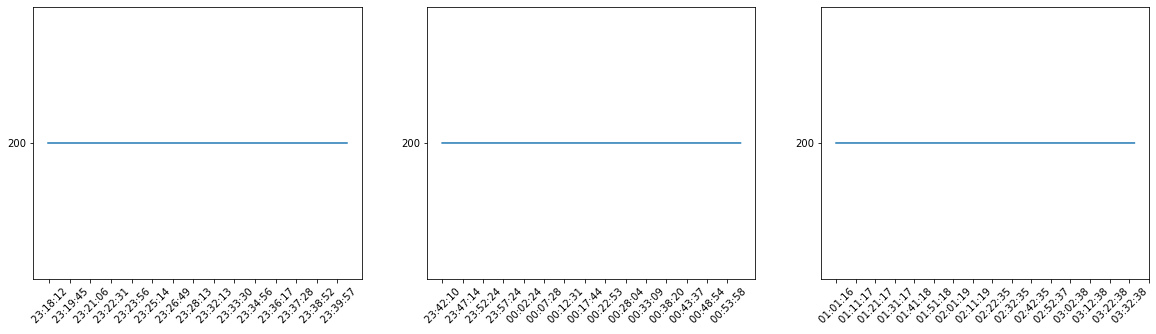

In [4]:
#3. Make plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(log_boliga[0],log_boliga[1])
ax2.plot(log_dataforsyning[0],log_dataforsyning[1])
ax3.plot(log_hvorlangterder[0],log_hvorlangterder[1])

ax1.xaxis.set_ticks(np.arange(1,290,20))
ax2.xaxis.set_ticks(np.arange(1,4500,300))
ax3.xaxis.set_ticks(np.arange(0,10000,600))

ax1.tick_params(axis="x",labelrotation=45)
ax2.tick_params(axis="x",labelrotation=45)
ax3.tick_params(axis="x", labelrotation=45)
#ax1.set_xticklabels(log_boliga[0])
fig.savefig("FIG1",bbox_inches = 'tight')


$\textbf{FIGURE 2:}$ Distribution of housing prices

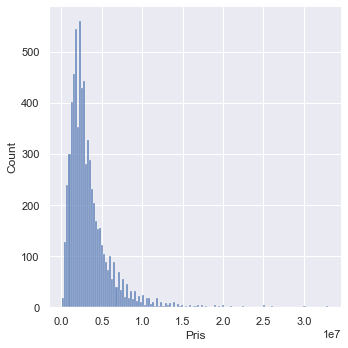

In [20]:
#1. Read logfile and plot distribution
df_data = pd.read_csv('v5.csv',index_col=[0])
sns.displot(df_data, x="Pris")
sns.set(rc={"figure.figsize":(0, 0)})
plt.savefig('FIG2.png')

$\textbf{FIGURE 3}$ Average housing price by region

In [31]:
#1. Load csv file with data
df_data = pd.read_csv('v5.csv', index_col=[0])
#df_data.head(2)

In [32]:
#2. Print out mean for each region in order to add datapoints to the plots
plot_avg_price_by_regions = df_data[['Pris','Region']].copy()
plot_avg_price_by_regions.groupby("Region").mean().round()

,Pris
Region,
Hovedstaden,4223273.0
Midtjylland,2590382.0
Nordjylland,2095775.0
Sjælland,1327667.0
Syddanmark,2020239.0


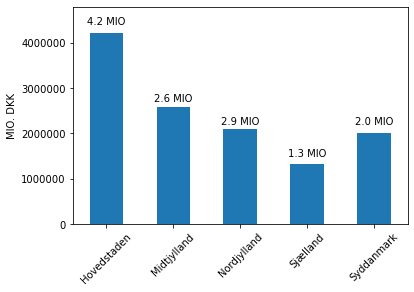

In [93]:
#3. Make plot
plot_avg_price_by_regions.groupby("Region").mean().plot(kind="bar")
plt.xlabel("")
plt.ylabel("MIO. DKK")
plt.xticks(rotation = 45)
plt.ylim(0,4800000)

#Add datapoints
plt.text(0,4400000, "4.2 MIO",horizontalalignment='center')
plt.text(1,2700000, "2.6 MIO",horizontalalignment='center')
plt.text(2,2200000, "2.9 MIO",horizontalalignment='center')
plt.text(3,1500000, "1.3 MIO",horizontalalignment='center')
plt.text(4,2200000, "2.0 MIO",horizontalalignment='center')
plt.legend().remove()
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('FIG2.png',bbox_inches = 'tight')

$\textbf{APPENDIX A:}$ Description of variabels

In [29]:
#1. Describe dataset
df_data.describe().round()
#print(appendix_1.to_latex(index=False)) 

,Pris,m2,rooms,x,y,daycare_distance,train_distance,school_distance,supermarket_distance,hospital_distance
count,6943.0,6943.0,6943.0,6943.0,6943.0,6943.0,6943.0,6943.0,6943.0,6943.0
mean,3421226.0,87.0,3.0,11.0,56.0,513.0,3298.0,809.0,514.0,5161.0
std,2784388.0,38.0,1.0,1.0,0.0,652.0,7265.0,1064.0,588.0,5925.0
min,125000.0,0.0,0.0,8.0,55.0,15.0,36.0,30.0,6.0,66.0
25%,1750000.0,61.0,2.0,10.0,56.0,246.0,1196.0,414.0,237.0,1847.0
50%,2695000.0,79.0,3.0,12.0,56.0,390.0,2056.0,637.0,383.0,3132.0
75%,4175000.0,103.0,3.0,13.0,56.0,601.0,3144.0,957.0,606.0,5651.0
max,33000000.0,674.0,11.0,15.0,58.0,15298.0,183483.0,22200.0,9811.0,48652.0


$\textbf{FIGURE 4}$ Irrelevant

(0.0, 1350.0)

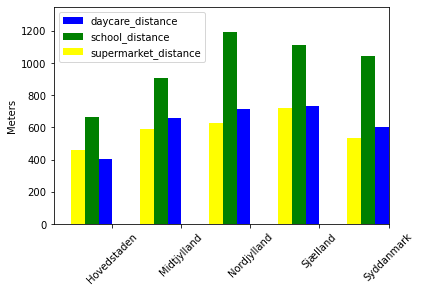

In [21]:
Distance_plot = df_data.copy()
#plt.bar(df_data["train_distance"], range(1,700), width=0.4, label = 'Female').groupby("Region")
#plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')

Distance_plot.set_index('Region', inplace=True)
Distance_plot.groupby('Region')['daycare_distance'].mean().plot(kind="bar",legend=True, width=0.2, color="blue", position=1)
#Distance_plot.groupby('Region')['train_distance'].mean().plot(kind="bar",legend=True, width=0.2, color="yellow", position=2)
#Distance_plot.groupby('Region')['hospital_distance'].mean().plot(kind="bar",legend=True, width=0.2, color="yellow", position=2)
Distance_plot.groupby('Region')['school_distance'].mean().plot(kind="bar",legend=True, width=0.2, color="green", position=2)
Distance_plot.groupby('Region')['supermarket_distance'].mean().plot(kind="bar",legend=True, width=0.2, color="yellow", position=3)

plt.xticks(rotation = 45)
plt.xlabel("")
plt.ylabel("Meters")
plt.ylim(0,1350)

$\textbf{FIGURE 4}$ Irrelevant or not. No space left in project

/Users/sevdaoztutk/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 720x720 with 0 Axes>

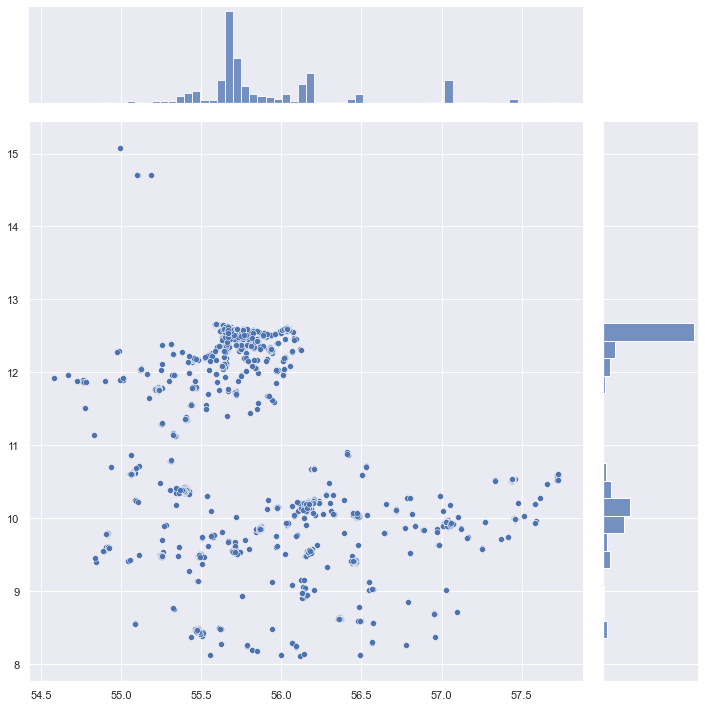

In [33]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df_data.y.values,y=df_data.x.values, size=10)
sns.despine